<a href="https://colab.research.google.com/github/ZKisielewska/learning-git-task/blob/master/M_20_FP_Credit_card_defaulters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introduction
In this case study, I will present how have I prepared for analysis of the default of credit card clients' dataset. I will use the `default_of_credit_card_clients.xls` [dataset](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fuploads.kodilla.com%2Fbootcamp%2Fds%2F20%2Fdefault_of_credit_card_clients.xls) for this.

**Acknowledgements:**

Any publications based on this dataset should acknowledge the following:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset can be found [here](https://archive.ics.uci.edu/datasets?search=default%20of%20credit%20card%20clients) at the UCI Machine Learning Repository.

#2. Business Understanding
In this part, we need to find out - what question the model is supposed to answer, how the problem is currently being solved, what information specialists in this field use and whether it is possible to apply machine learning to this issue.

- Make a binary **classification** model to predict customers who will "Default" **(1)** and who are "Not likley to Default"**(0)**.

- Whether the customer can get a credit card.

#3. Data Understanding

In this section, we should answer the question of which independent variables **(X)** affect our dependent variable **(y)** and what steps we should take next:

- whether any variable is a data leak and should be removed?
- Are the variables correlated with each other and convey the same information?
- Are there any missing values in the data and HOW TO COMPLETE THEM?
- Are there outliers/false values and how/should we replace them?
- How to transform the data to make the model "easier"?

Let's start by loading the basic libraries and then the database.

In [1]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, precision_recall_curve, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style('darkgrid')
random_state = 42

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/credit_card.xls', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# shape of data
df.shape

(30000, 25)

This dataset gathers 30.000 observations made by a bank in Taiwan on distinct credit card holders from April 2005 to September 2005. The dataset employs the binary variable **default.payment.next.month** as **response variable**. It indicates whether or not the credit card holders are defaulters next month (YES-1, NO-0). Then, the following 24 variables are used as explanatory variables.

Personal data:

- **LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit
- **SEX:** Gender (1=male, 2=female)
- E**DUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- **MARRIAGE:** Marital status (1=married, 2=single, 3=others)
- **AGE:** Age in years

History of past payment:

- **PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- **PAY_2**: Repayment status in August, 2005 (scale same as above)
- **PAY_3:** Repayment status in July, 2005 (scale same as above)
- **PAY_4:** Repayment status in June, 2005 (scale same as above)
- **PAY_5:** Repayment status in May, 2005 (scale same as above)
- **PAY_6:** Repayment status in April, 2005 (scale same as above)

Amount of bill statement (in New Taiwan dollars), i.e. a monthly report that credit card companies issue to credit card holders in a specific month:

- **BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)
- **BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)
- **BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)
- **BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)
- B**ILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)
- **BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)

Amount of previous payment (in New Taiwan dollars): 18. PAY_AMT1:

- **PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)
- **PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)
- **PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)
- **PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)
- **PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)
- **PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)

Response variable:

- **DEFAULT:** (default.payment.next.month) Default payment (1=yes, 0=no)

In [4]:
# basic information of datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

We can see that the type of variables is integer. We will deal with this further in the analysis.

In [6]:
# summary of dataset
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
# check for na values in dataset
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

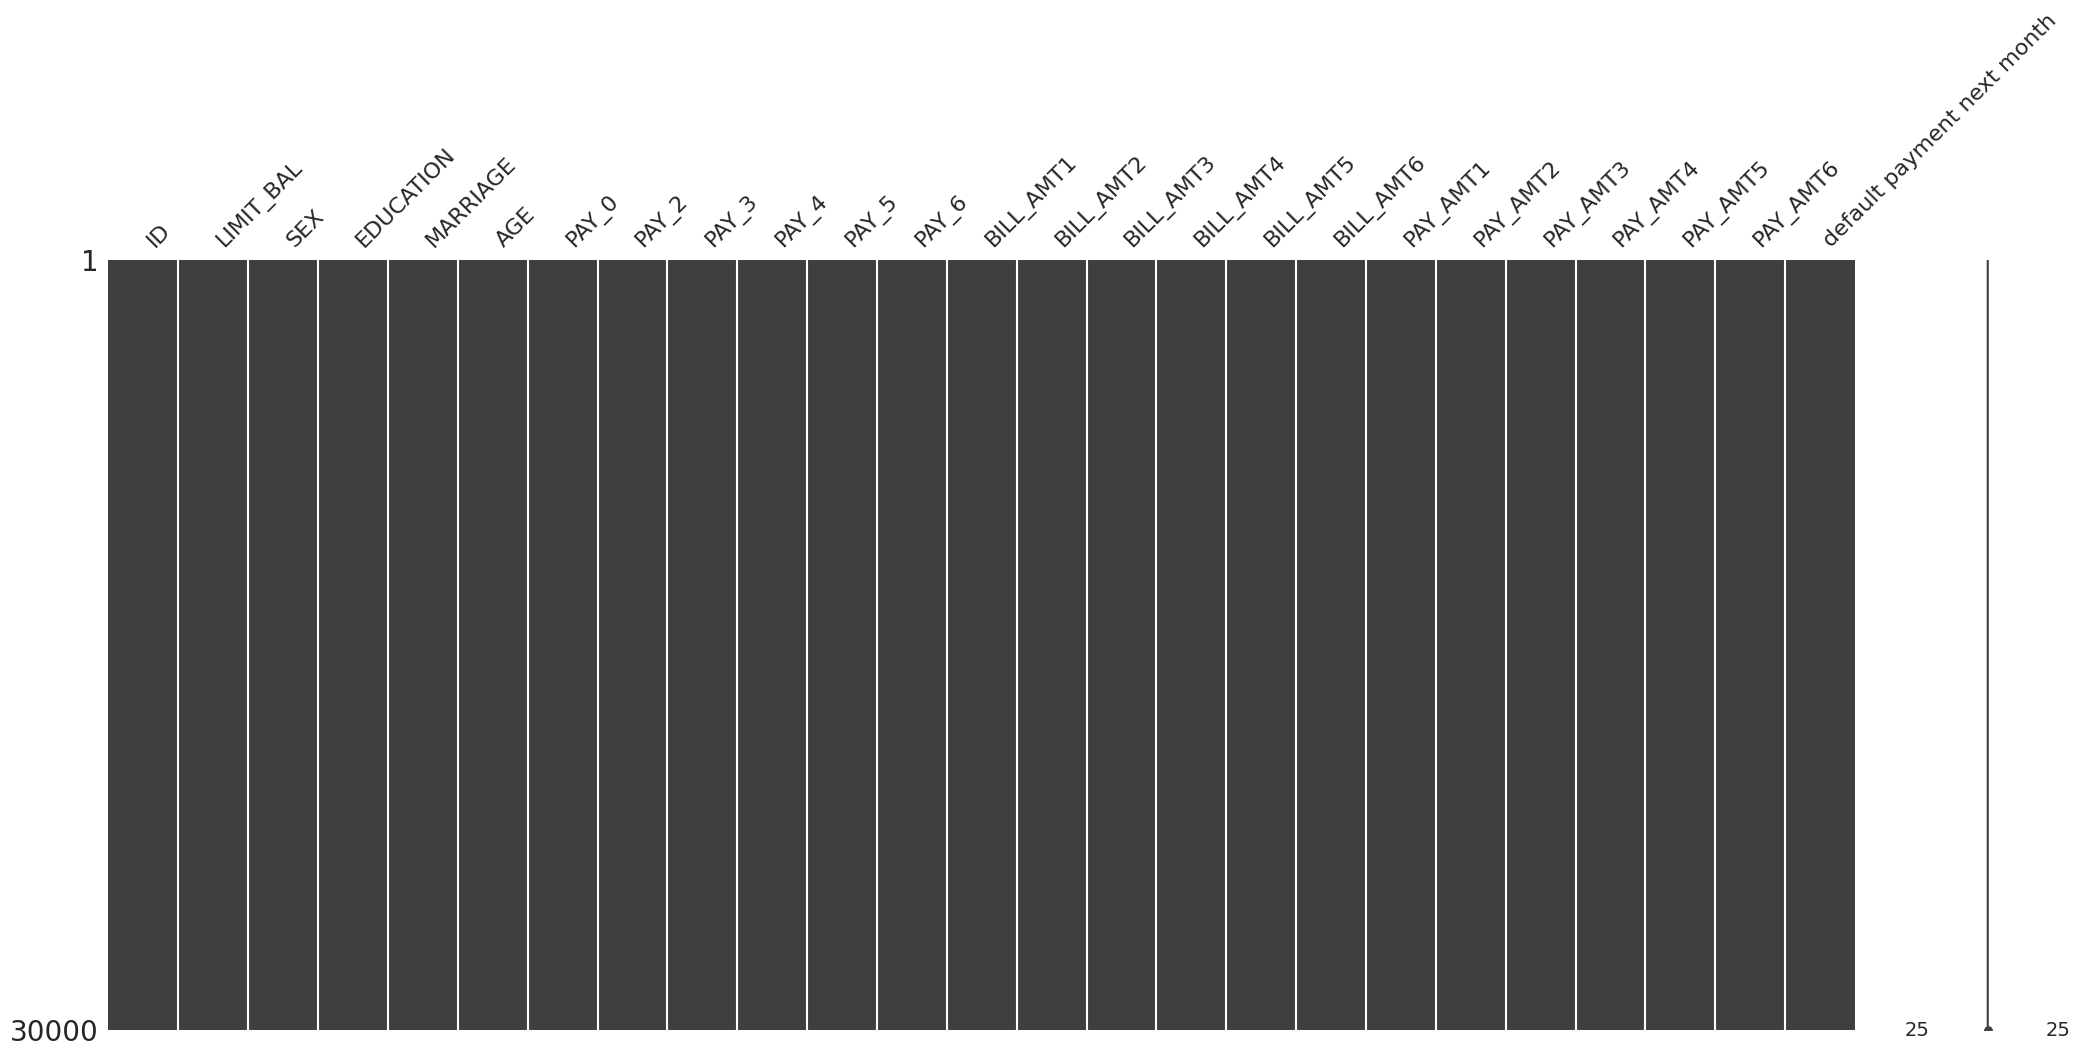

In [8]:
import missingno as msno
msno.matrix(df)

Dataset dose not contains any NA values, null values and duplicates.

## 3.1 Data Preprocessing
Changing name of some columns for simplicity and better understanding

In [9]:
# columns of dataset
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
# renaming of columns
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN',
                   'BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN',
                   'PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}, inplace=True)

In [12]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
# replacing values with their labels
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [14]:
# check for replaced labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


## 3.2.  Exploratory Data Analysis
### **IsDefaulter**

In [27]:
import plotly.express as px

# distribution of Data
fig_default = px.pie(df,
                 names = df['IsDefaulter'].value_counts().reset_index().index,
                 values = df['IsDefaulter'].value_counts().reset_index()['IsDefaulter'],
                 title = "Data Distribution for Credit Default", width=500, height=500)
fig_default.show()

We can see that the dataset we are dealing with is quite unbalanced, with only 6636 defaulters (22.1% of the total number). This is a rather relevant problem that needs to be addressed. If neglected, classification models will tend to focus on the majority class and overlook the minority class.

### **SEX**

<Axes: xlabel='SEX', ylabel='count'>

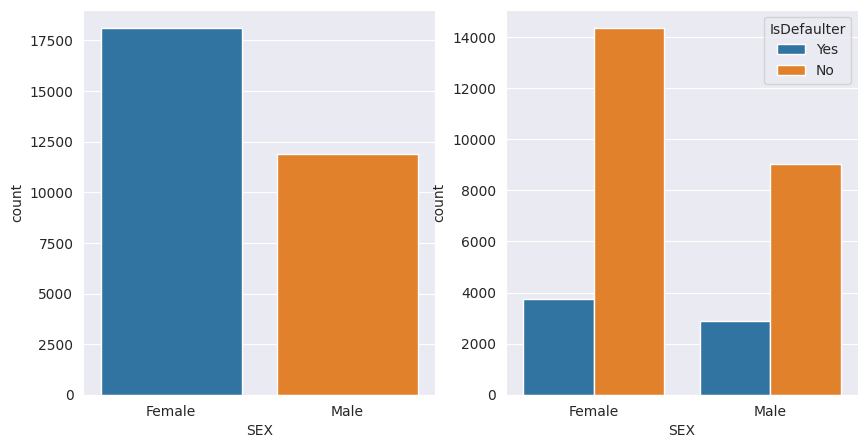

In [17]:
# count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df)

Both classes are disproportionate, meaning we are dealing with an unbalanced dataset. We can observe that females have more probability of default than males. However, the Female group is greater than the Male.

### **EDUCATION**

In [18]:
# category wise values
df['EDUCATION'].value_counts()

University         14030
Graduate School    10585
High School         4917
5                    280
Others               123
6                     51
0                     14
Name: EDUCATION, dtype: int64

In EDUCATION variable, we discover some unexpected values 5,6, and 0, when the data description only provides value 1,2,3 and 4. We decide to combine 5,6,0 all into new variable, which stands for **'Others'**.

In [19]:
# replace values with 5, 6 and 0 to Others
df.EDUCATION = df.EDUCATION.replace({5: "Others", 6: "Others", 0: "Others"})

<Axes: xlabel='EDUCATION', ylabel='count'>

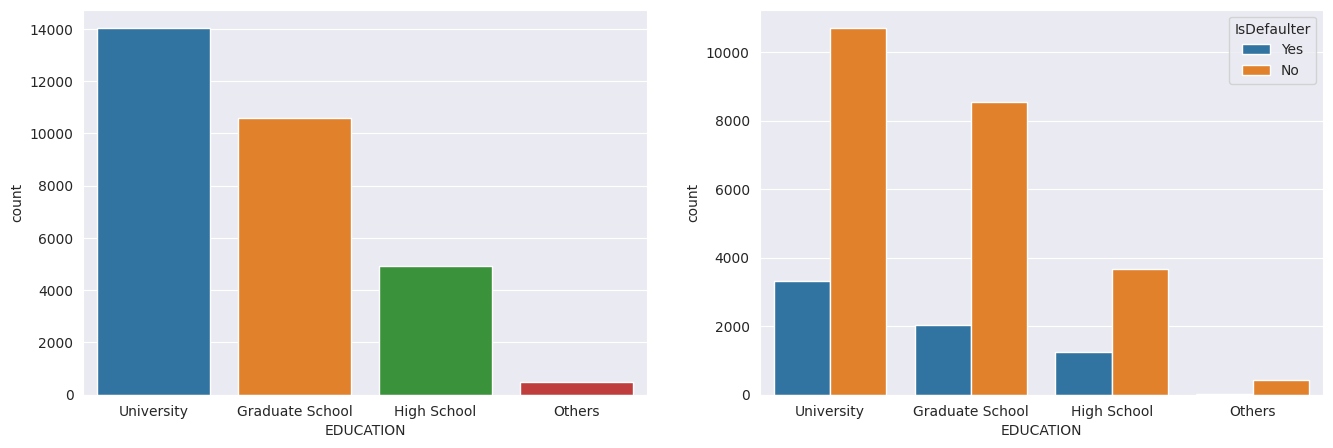

In [22]:
# count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(16,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = df)

### **MARRIAGE, AGE**

In [29]:
# category wise values
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       323
0             54
Name: MARRIAGE, dtype: int64

In [30]:
# replace 0 with Others
df.MARRIAGE = df.MARRIAGE.replace({0: "Others"})

<Axes: xlabel='MARRIAGE', ylabel='count'>

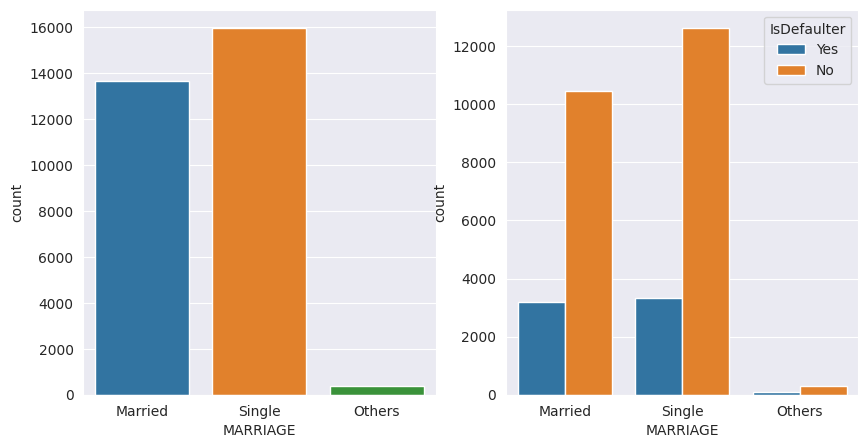

In [ ]:
# count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df)

For EDUCATION feature we can see that most of the defaulters have a degree from graduate/university/high school. Among them, clients who have a university degree are more likely to default than others. Singles also have more prabability of default than married people.

<Axes: xlabel='AGE', ylabel='count'>

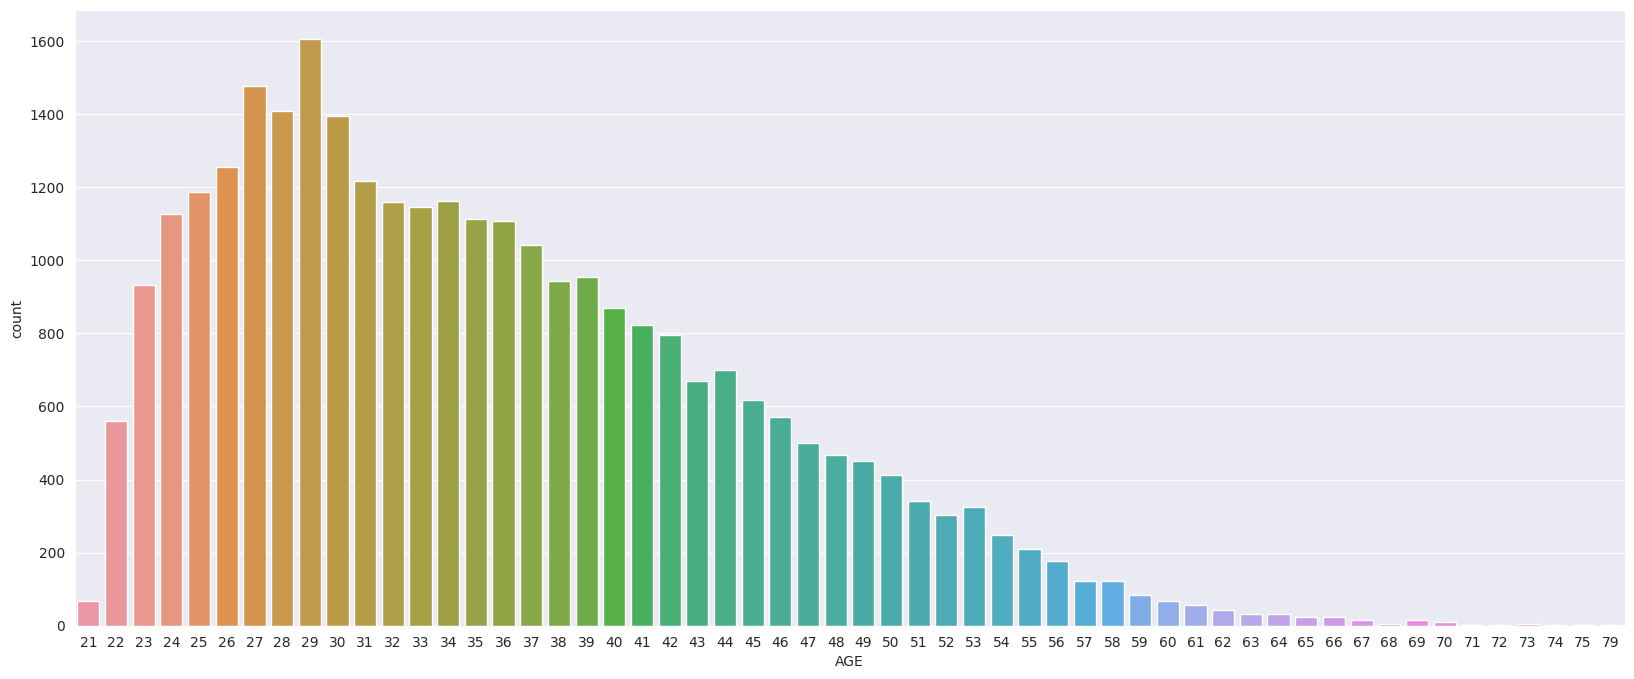

In [31]:
# values count for AGE
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

<Axes: xlabel='AGE', ylabel='count'>

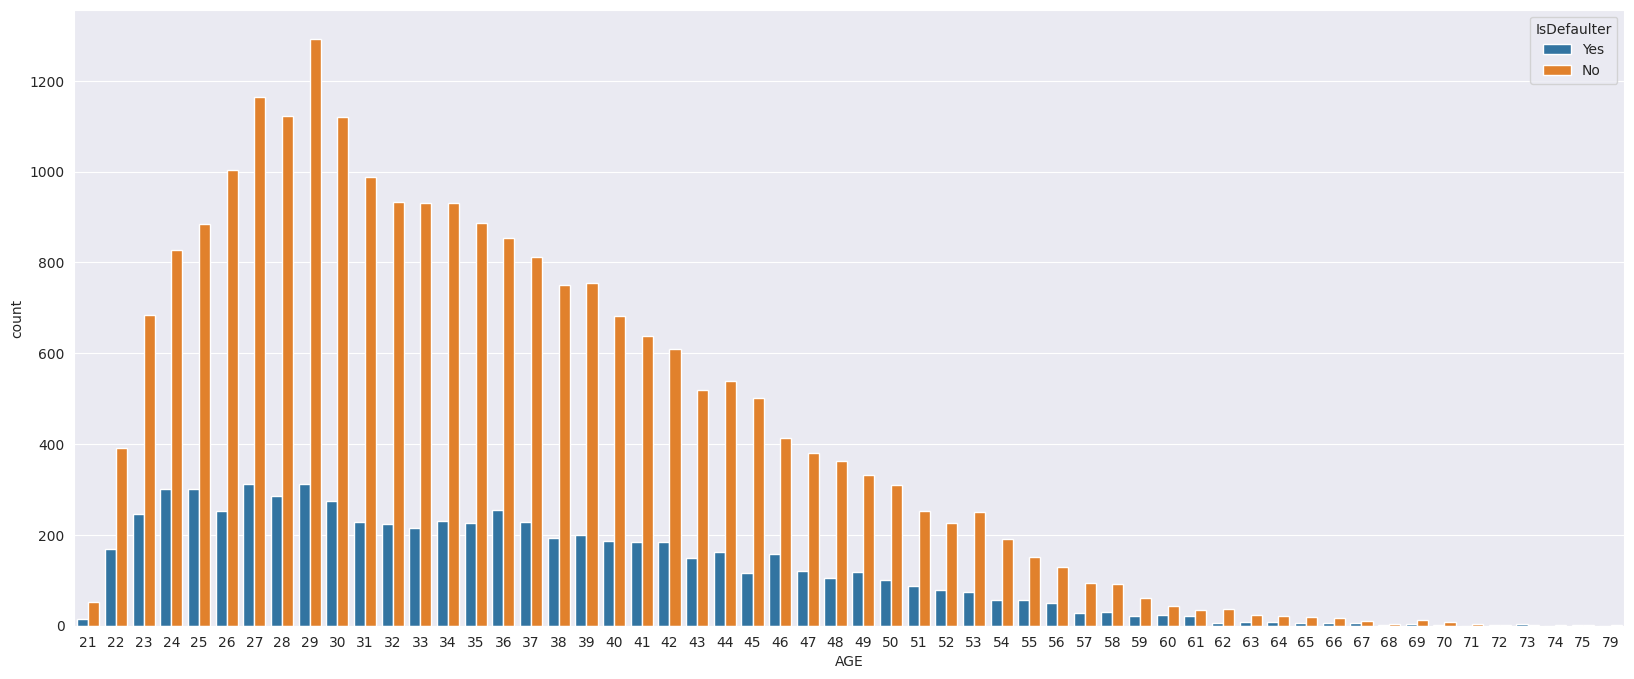

In [32]:
# values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

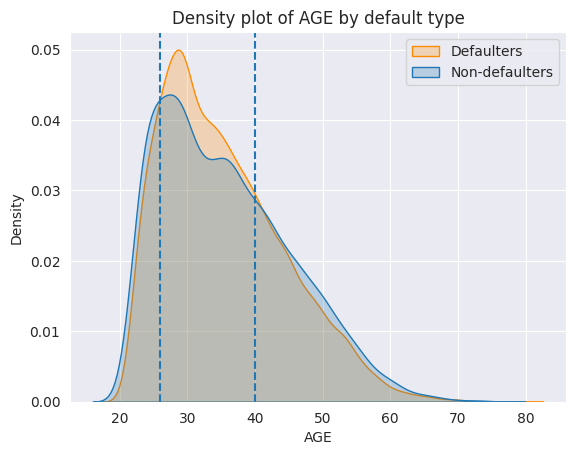

In [35]:
# density plot of Age by default
class_0 = df.loc[df['IsDefaulter'] == 'Yes']['AGE']
class_1 = df.loc[df['IsDefaulter'] == 'No']['AGE']
plt.title('Density plot of AGE by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange')
sns.kdeplot(class_0, fill=True, label='Non-defaulters')
plt.axvline(26, 0, ls='--')
plt.axvline(40, 0, ls='--')
plt.legend()

plt.show()

Around 25 to 40 years of age are more likely to default, indicating that consumers in this age group are more able to repay their credit card loans. This may be because their job and family seem to be stable and the family income allows them to pay off their credit card debt.

### **Past Payment**

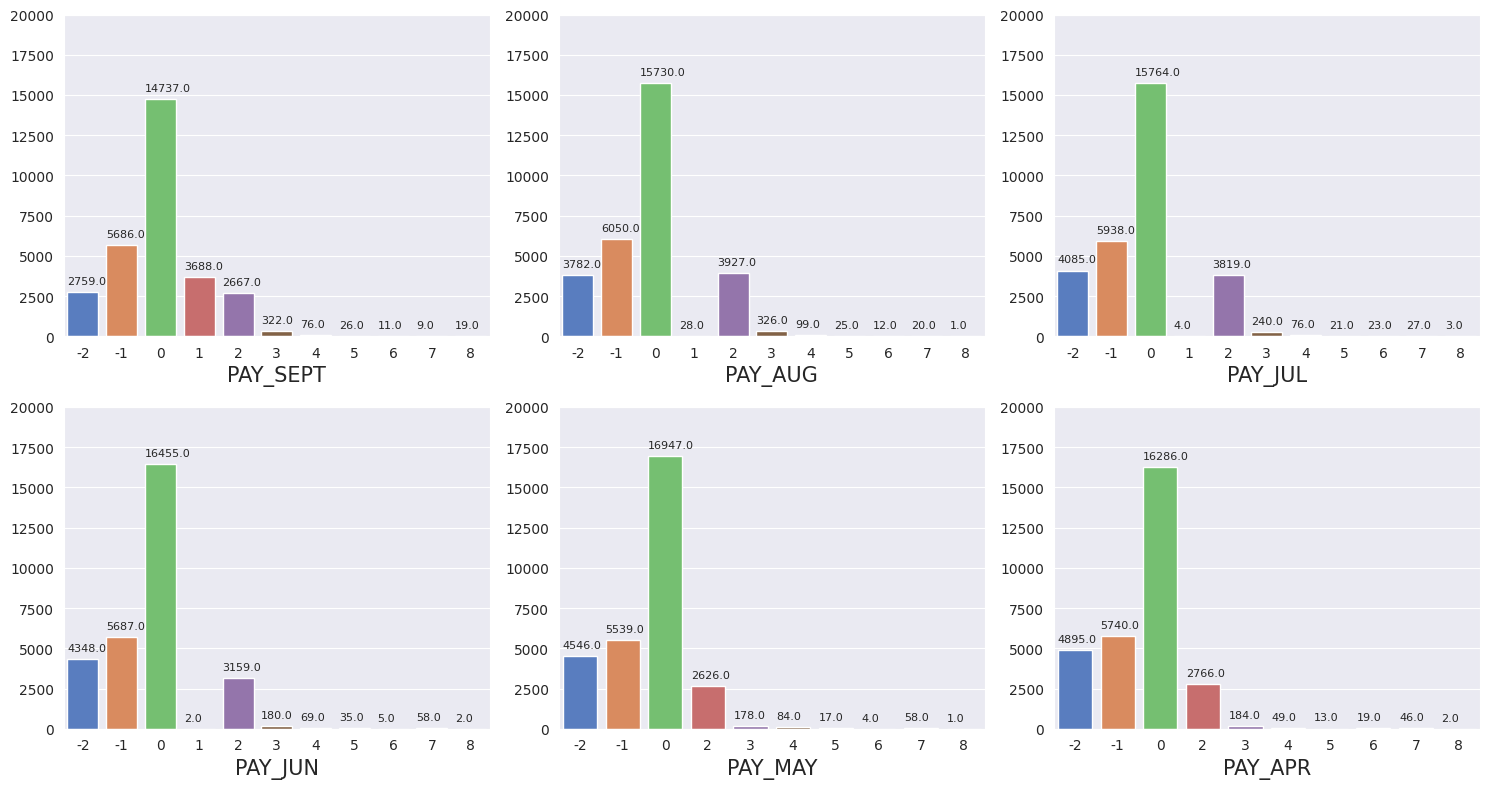

In [37]:
PAY_cols = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
plt.figure(figsize=(15,8))

for i, col in enumerate(PAY_cols):
    plt.subplot(2, 3, i + 1)
    ax = sns.countplot(x=df.loc[:,col], palette = 'muted')
    plt.ylim(0,20000)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('')
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x(), p.get_height()+500), fontsize = 8)

plt.show()

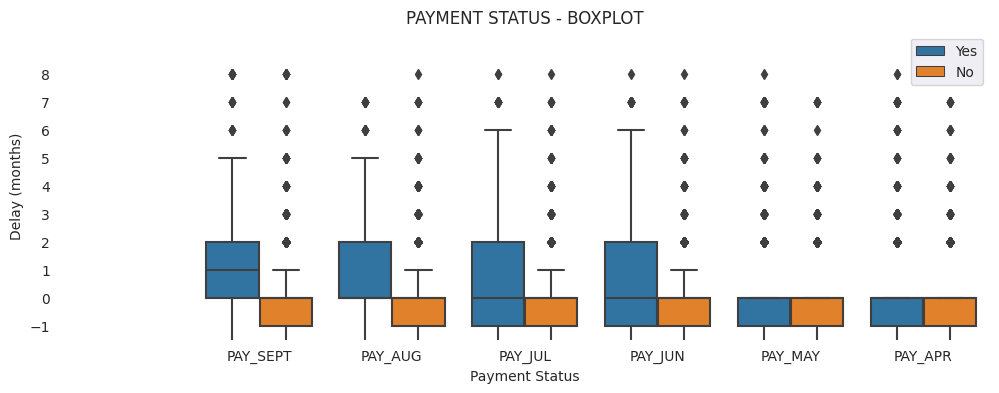

In [39]:
# boxplots for historical payment
repayment = df[['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'IsDefaulter']]
repayment = pd.melt(repayment,
                    id_vars="IsDefaulter",
                    var_name="Payment Status",
                    value_name='Delay (months)')


plt.figure(figsize=(12,4))
sns.boxplot(y="Delay (months)", x="Payment Status", hue="IsDefaulter", data=repayment)
plt.xlim([-1.5,5.5])
plt.ylim([-1.5,9.5])
plt.yticks(np.arange(-1,9))
plt.title('PAYMENT STATUS - BOXPLOT')
plt.legend()
plt.box(False)

The payment status feature set is shown above via boxplots. It can be seen that clients who delay payment by one month or less have fewer credit card defaults. In particular, the repayment status in September, i.e., PAY_1, holds a greater discriminatory power than the repayment status in the other months.

### **Bill Statement**

Amount (in New Taiwan dollars) monthly report that credit card companies issue to credit card holders in a specific month.

In [41]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter'],
      dtype='object')

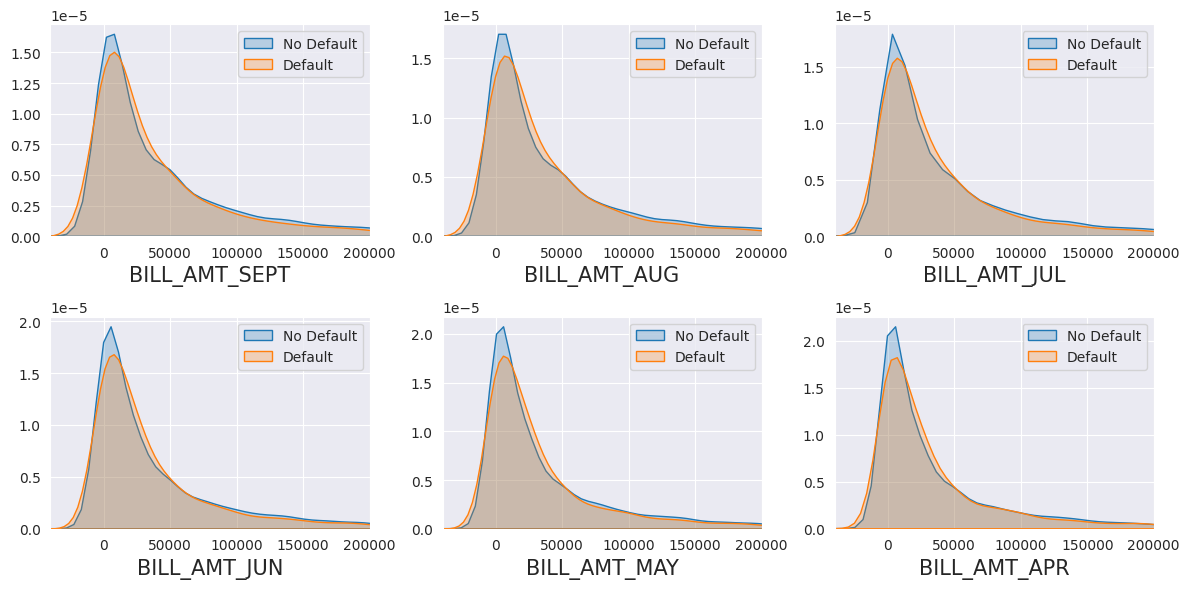

In [44]:
BILL_AMT_cols = ['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']
plt.figure(figsize=(12,6))

for i, col in enumerate(BILL_AMT_cols):
  plt.subplot(2, 3, i + 1)
  sns.kdeplot(df.loc[(df['IsDefaulter'] == 'No'), col], label='No Default', shade=True)
  sns.kdeplot(df.loc[(df['IsDefaulter'] == 'Yes'), col], label='Default', shade=True)
  plt.xlim(-40000, 200000)
  plt.ylabel('')
  plt.xlabel(col, fontsize=15)
  plt.legend()
  plt.tight_layout()

plt.show()

We can observe that for bank statements for credit cards up to 50,000, the probability of defaulting on credit card debt is lower than non-default. We can see that we are dealing with a right-skewed distribution.

### **Previous Payment**
Amount of previous payment (in New Taiwan dollars).

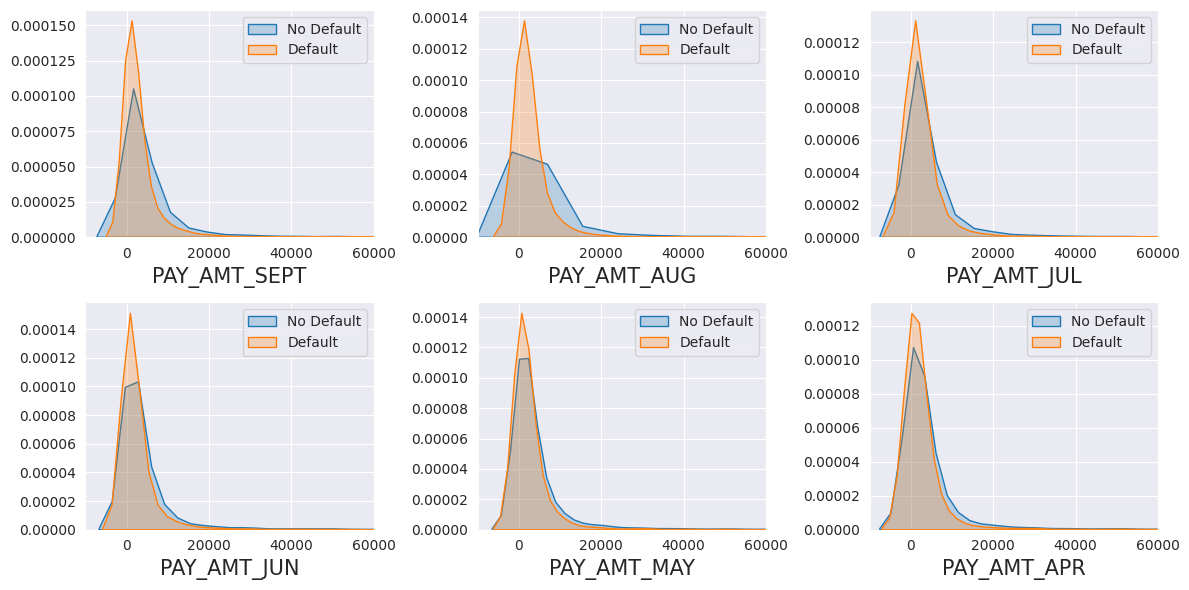

In [45]:
PAY_AMT_cols = ['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
plt.figure(figsize=(12,6))

for i,col in enumerate(PAY_AMT_cols):
    plt.subplot(2,3,i + 1)
    sns.kdeplot(df.loc[(df['IsDefaulter'] == 'No'), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['IsDefaulter'] == 'Yes'), col], label = 'Default', shade = True)
    plt.xlim(-10000,60000)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()


There is a higher default rate among those who paid nothing in previous months and lower rates among those who paid over 25k of NT dollars.

##3.3.  Correlation

The considered dataset has many features that can be correlated and may lead to a drop in the performances of some classification algorithms. Some methods assume the independence of the predictors and benefit from dimensionality reduction.

**Pearson’s Correlation Coefficient (*p*)**
 helps us to find out the relationship between two variables, measuring the strength of association between them. It is calculated as the covariance between two features X and Y (numerator) divided by the product of their standard deviations (denominator):

 <br/>
 <br/>
 <ceneter> $$p_x,_y = \frac{Cov(X, Y)}{σ_X, σ_Y}$$ <center>


The value of Pearson’s Correlation Coefficient can be between -1 and 1:

- +1 means that they are highly correlated,
- 0 means no correlation,
- -1 means that there is a negative correlation (inverse proportion).

Below we show only the lower half of the correlation matrix between the numeric features (diagonal excluded).

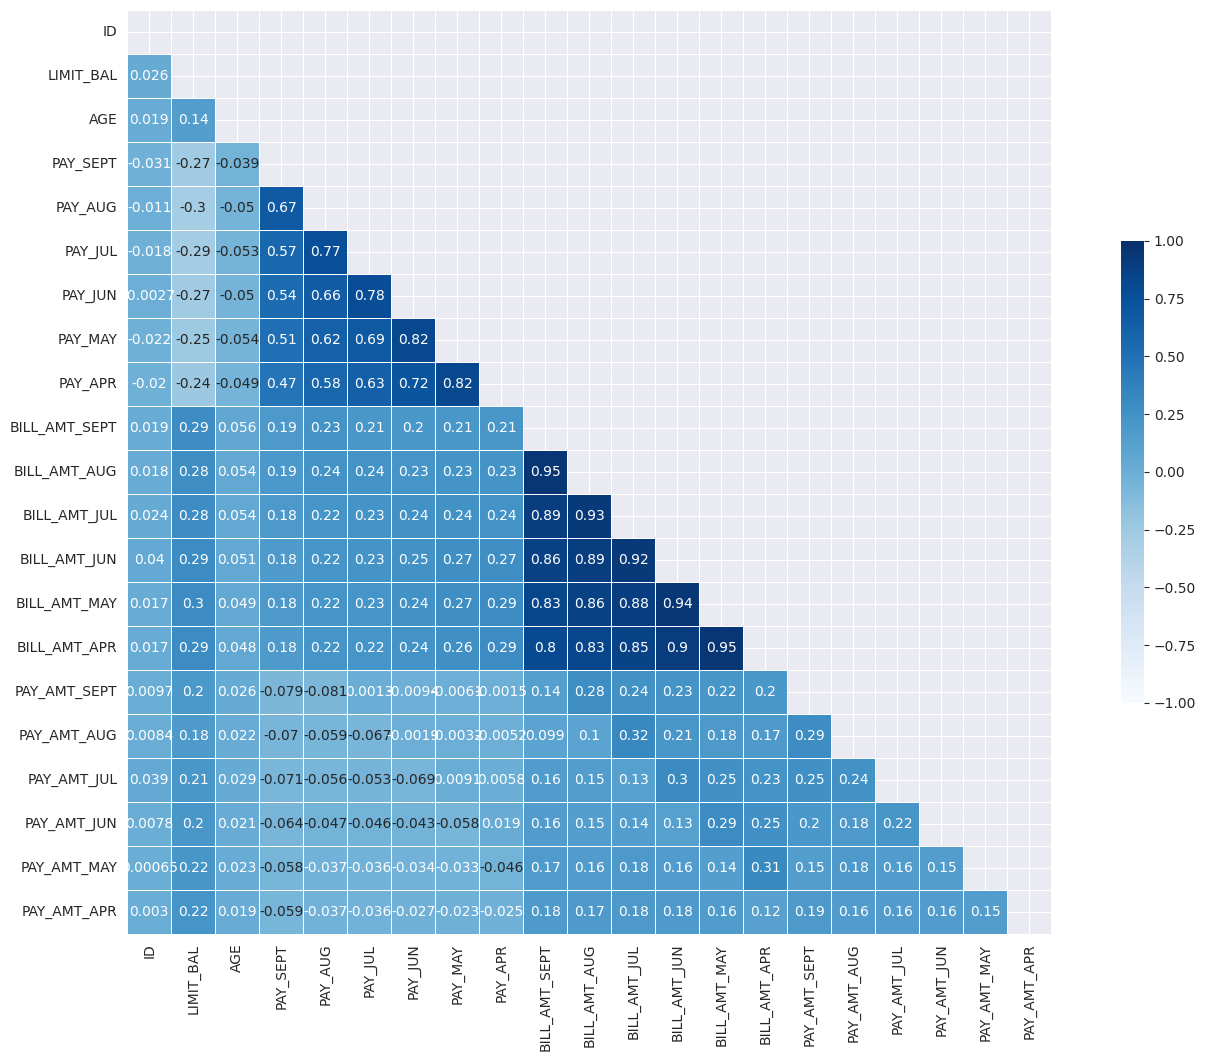

In [48]:
# correlation matrix for numeric features
num_features = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR',
                'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
                'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter']
corr = df[num_features].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='Blues', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar

There is a strong positive correlation between the BILL_AMTn features, which may indicate a redundancy of information.

We report the scatter plots of these variables to highlight their interaction. The matrix below contains, for each combination of variables, a small scatterplot that displays the distribution of data points among the two variables considered, separated by the two classes. The linear trend confirms what the Pearson coefficient suggested, namely that the BILL_AMTn features encode rather similar information.

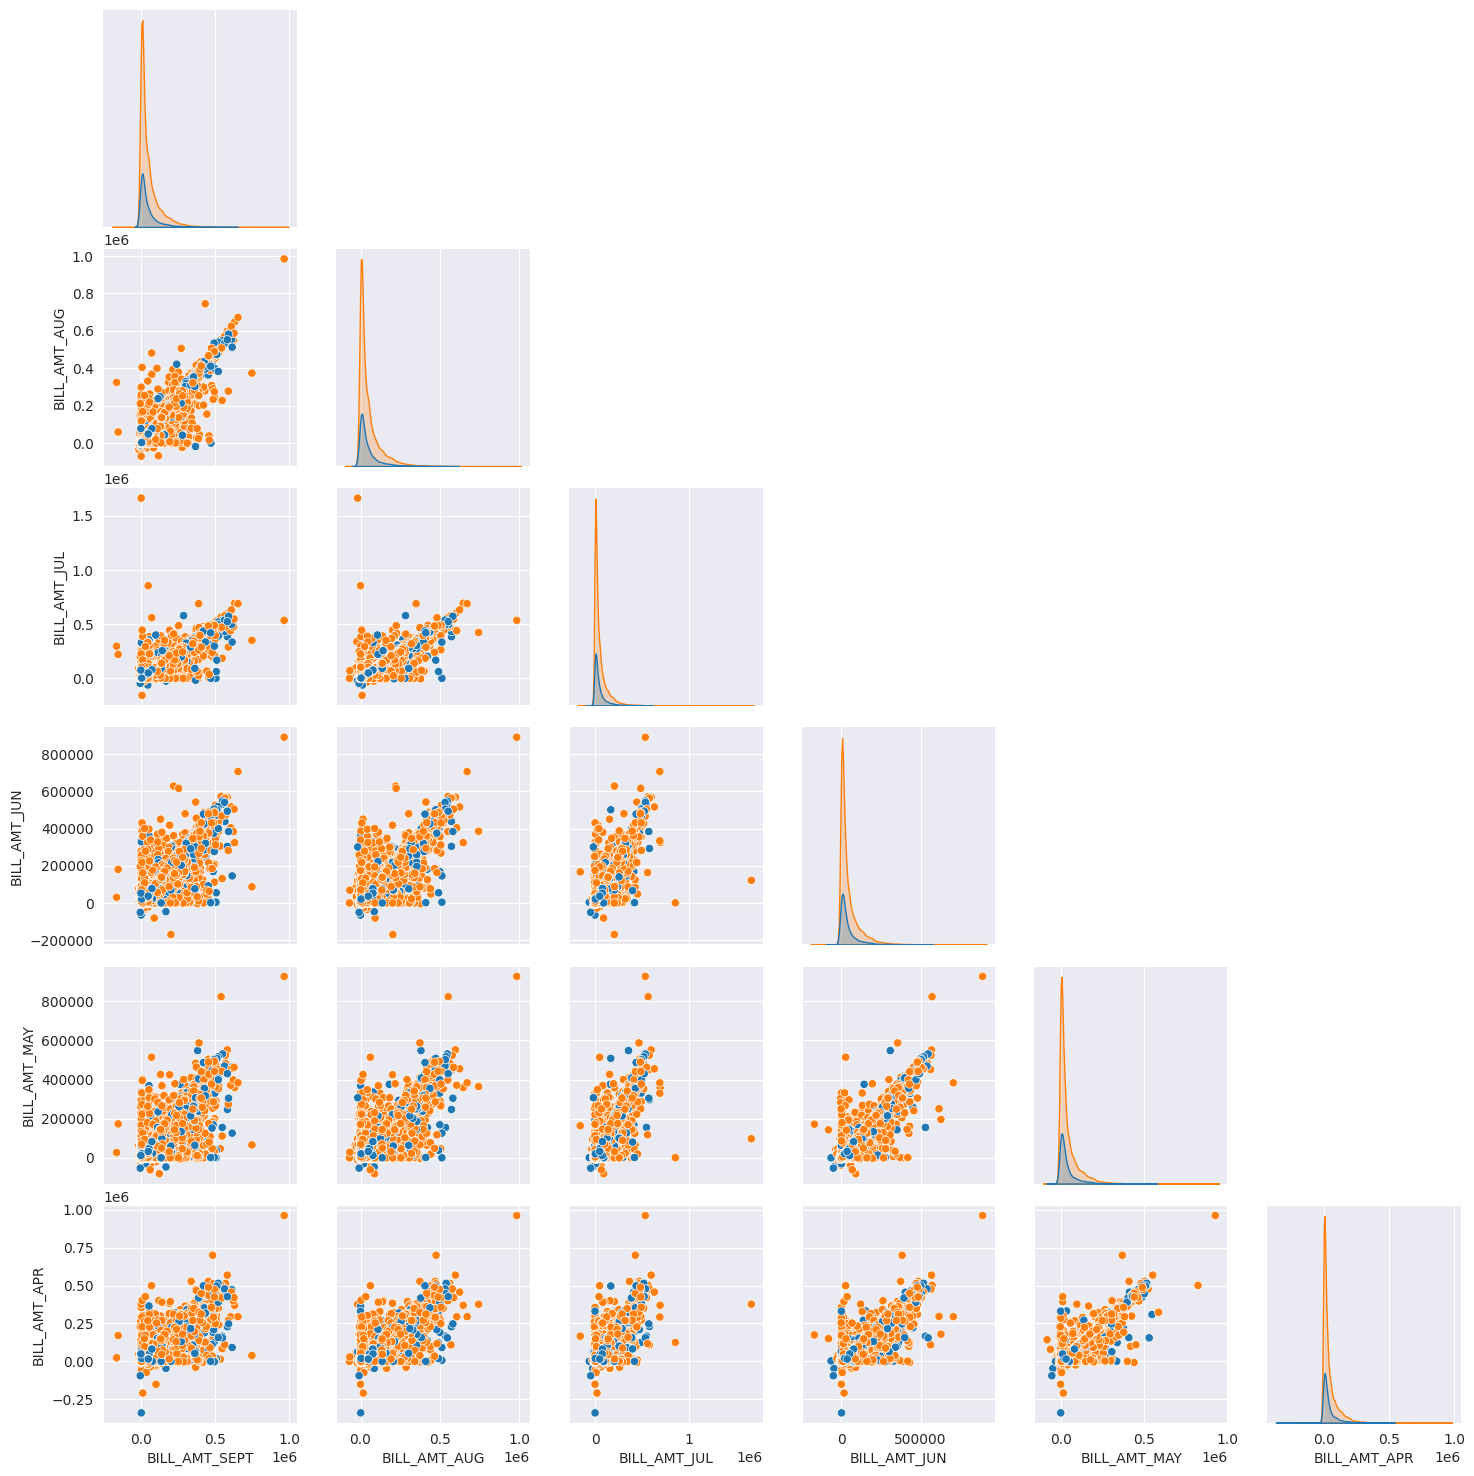

In [49]:
pair_plot = sns.pairplot(df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR','IsDefaulter']], hue='IsDefaulter', diag_kind='kde', corner=True)
pair_plot._legend.remove()

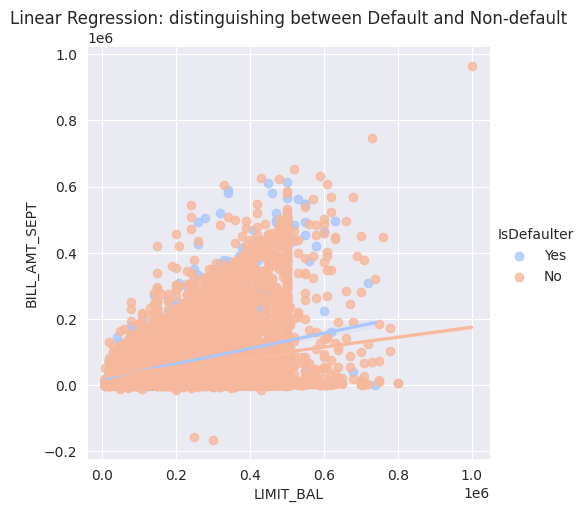

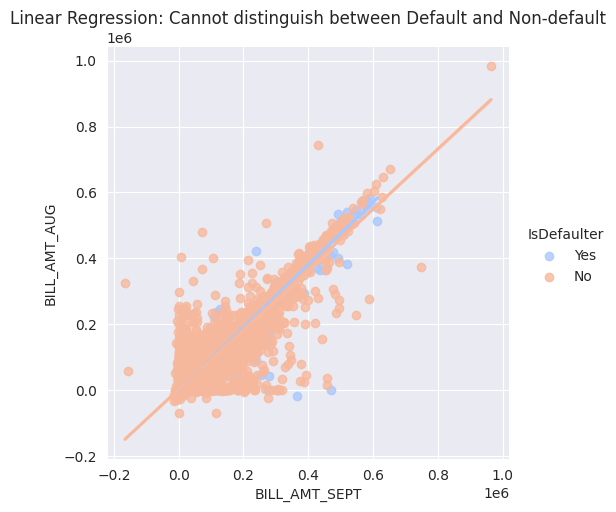

In [51]:
sns.lmplot(x='LIMIT_BAL', y= 'BILL_AMT_SEPT', data = df, hue ='IsDefaulter',
           palette='coolwarm')
plt.title('Linear Regression: distinguishing between Default and Non-default', size=12)


sns.lmplot(x='BILL_AMT_SEPT', y= 'BILL_AMT_AUG', data = df, hue ='IsDefaulter',
           palette='coolwarm')
plt.title('Linear Regression: Cannot distinguish between Default and Non-default', size=12);

Uncorrelated data are potentially more useful: discrimentory.

# 4. Data Preprocessing

The quality of the data and the amount of useful information contained in our dataset, are key factors that determine how well a machine learning algorithm can learn. Therefore, it is absolutely critical to ensure that we examine and preprocess our dataset before we feed it to a learning algorithm.

### **Label Incoding**

In [52]:
# label encoding
encoders_nums = {"SEX":{"Female":0,"Male":1}, "IsDefaulter":{"Yes":1, "No":0}}

df = df.replace(encoders_nums)

In [53]:
# check for changed labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,0,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### **One Hot Encoding**

In [54]:
# creating dummy variables
df = pd.get_dummies(df, columns = ['EDUCATION', 'MARRIAGE'])

In [55]:
df.shape

(30000, 30)

In [56]:
df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1, inplace=True)

In [57]:
df.shape

(30000, 28)

In [58]:
# creating dummy variables by droping firs variable
df = pd.get_dummies(df, columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [59]:
df.shape

(30000, 80)

In [60]:
# check for all the created variables
df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,0,1,0,0,0,0,0,0,0


In [61]:
#shape of dataset after creating dummy variables
df.shape

(30000, 80)

## 4.1.  Class Imbalance

**SMOTE** - Synthetic Minority Oversampling Technique

We know that the dataset we are dealing with is unbalanced, as the non-defaulter examples are over-represented. We could achieve almost 80% accuracy by just predicting the majority class (non-defaulters). Class imbalance influences a learning algorithm during model fitting itself. Since machine learning algorithms typically optimize a reward or cost function the decision rule is likely going to be biased toward the majority class.

To mitigate these issues, we choose to adopt the Synthetic Minority Oversampling Technique (SMOTE).

In [62]:
# importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')], df['IsDefaulter'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [63]:
# creating new dataframe from balanced dataset after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))

In [64]:
# adding target variable to new created dataframe
balanced_df['IsDefaulter'] = y_smote

In [65]:
# shape of balanced dataframe
balanced_df.shape

(46728, 80)

In [70]:
# removing feature ID from dataset
balanced_df.drop('ID',axis = 1, inplace = True)

In [71]:
# final dataset
balanced_df.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,1,0,0,0,0,0,0,1
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


## 4.2. Data Transformation and Splitting

In [72]:
# seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']

In [74]:
# data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [75]:
# splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [76]:
X_train.shape

(37382, 78)

In [77]:
X_test.shape

(9346, 78)

# 5.  Modelling

## 5.1.  Baseline Model Implementation

### **Logistic Regression**

In [ ]:
#fitting data into Logistic Regression
logi = LogisticRegression()
logi.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [ ]:
#getting all scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.827
The accuracy on test data is  0.834
The precision on test data is  0.799
The recall on test data is  0.858
The f1 on test data is  0.828
The roc_score on test data is  0.835


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      4673
           1       0.86      0.80      0.83      4673

    accuracy                           0.83      9346
   macro avg       0.84      0.83      0.83      9346
weighted avg       0.84      0.83      0.83      9346



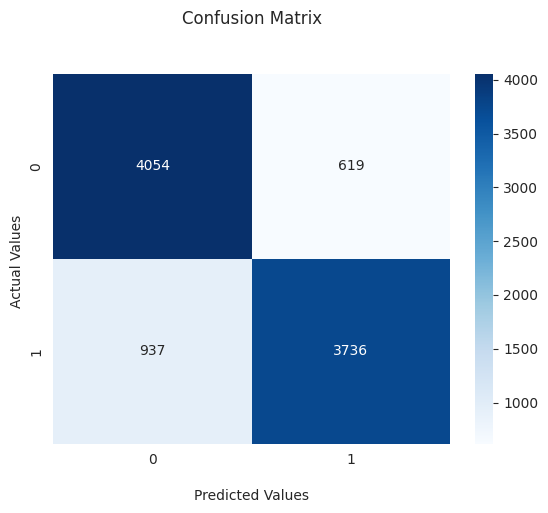

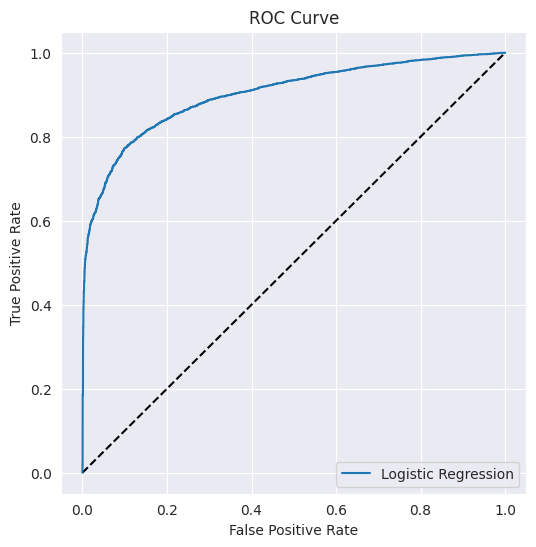

,Model,F1_score,AUC
0,Logistic Regression,0.827647,0.902183


In [ ]:
calculate_metrics(logi, 'Logistic Regression', X_test, y_test)

### **Decision Tree Classification**

In [ ]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [ ]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  1.0
The accuracy on test data is  0.796
The precision on test data is  0.809
The recall on test data is  0.788
The f1 on test data is  0.798
The roc_score on test data is  0.796


              precision    recall  f1-score   support

           0       0.80      0.78      0.79      4673
           1       0.79      0.81      0.80      4673

    accuracy                           0.80      9346
   macro avg       0.80      0.80      0.80      9346
weighted avg       0.80      0.80      0.80      9346



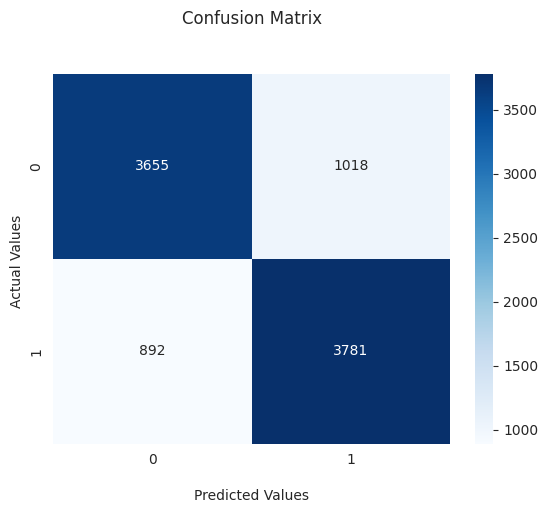

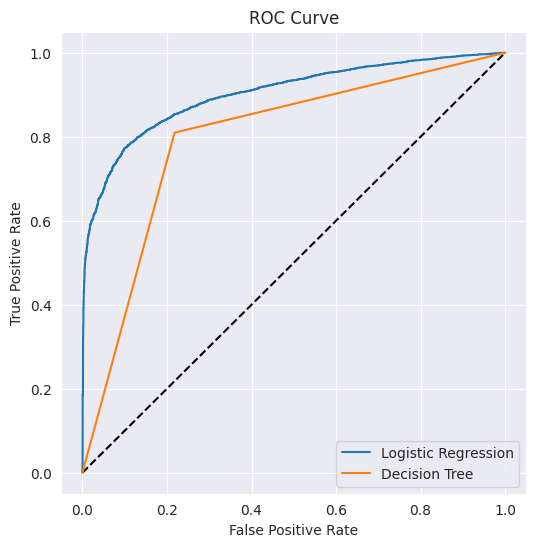

,Model,F1_score,AUC
0,Logistic Regression,0.827647,0.902183
1,Decision Tree,0.798353,0.795845


In [ ]:
calculate_metrics(dtc, 'Decision Tree', X_test, y_test)

### **Random Forest Classification**

In [ ]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [ ]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.999
The accuracy on test data is  0.871
The precision on test data is  0.834
The recall on test data is  0.9
The f1 on test data is  0.866
The roc_score on test data is  0.873


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4673
           1       0.90      0.83      0.87      4673

    accuracy                           0.87      9346
   macro avg       0.87      0.87      0.87      9346
weighted avg       0.87      0.87      0.87      9346



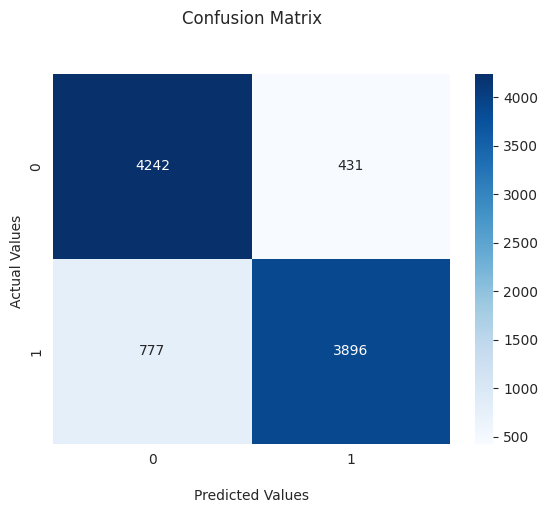

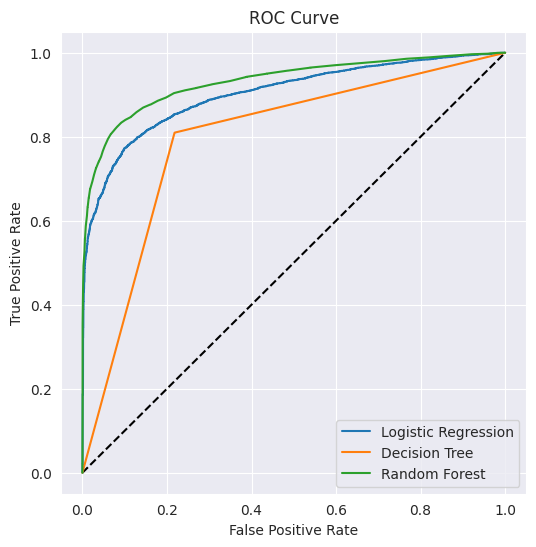

,Model,F1_score,AUC
0,Logistic Regression,0.827647,0.902183
1,Decision Tree,0.798353,0.795845
2,Random Forest,0.865778,0.931973


In [ ]:
calculate_metrics(rfc, 'Random Forest', X_test, y_test)

### **Support Vector Machine**

In [ ]:
#importing Support Vector Classifier
from sklearn.svm import SVC

In [ ]:
#fitting data into Support Vector Classifier
svm=SVC(kernel='rbf', probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
#class prediction of y
y_pred_svm=svm.predict(X_test)
y_train_pred_svm=svm.predict(X_train)

In [ ]:
#getting all scores for Support Vector Classifier
train_accuracy_svm = round(accuracy_score(y_train_pred_svm,y_train), 3)
accuracy_svm = round(accuracy_score(y_pred_svm,y_test), 3)
precision_score_svm = round(precision_score(y_pred_svm,y_test), 3)
recall_score_svm = round(recall_score(y_pred_svm,y_test), 3)
f1_score_svm = round(f1_score(y_pred_svm,y_test), 3)
roc_score_svm = round(roc_auc_score(y_pred_svm,y_test), 3)

print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", accuracy_svm)
print("The precision on test data is ", precision_score_svm)
print("The recall on test data is ", recall_score_svm)
print("The f1 on test data is ", f1_score_svm)
print("The roc_score on test data is ", roc_score_svm)

The accuracy on train data is  0.846
The accuracy on test data is  0.841
The precision on test data is  0.768
The recall on test data is  0.899
The f1 on test data is  0.829
The roc_score on test data is  0.848


              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4673
           1       0.90      0.77      0.83      4673

    accuracy                           0.84      9346
   macro avg       0.85      0.84      0.84      9346
weighted avg       0.85      0.84      0.84      9346



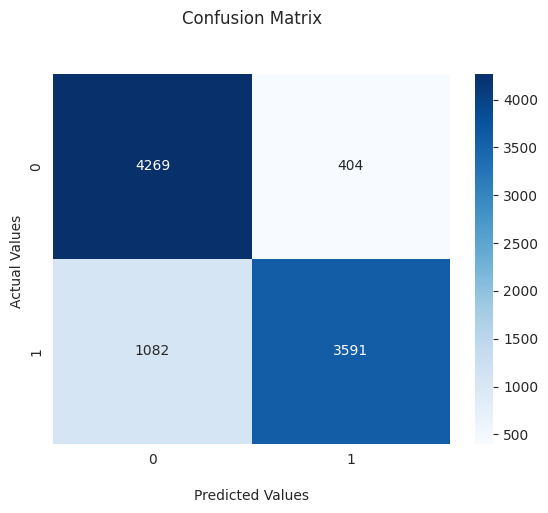

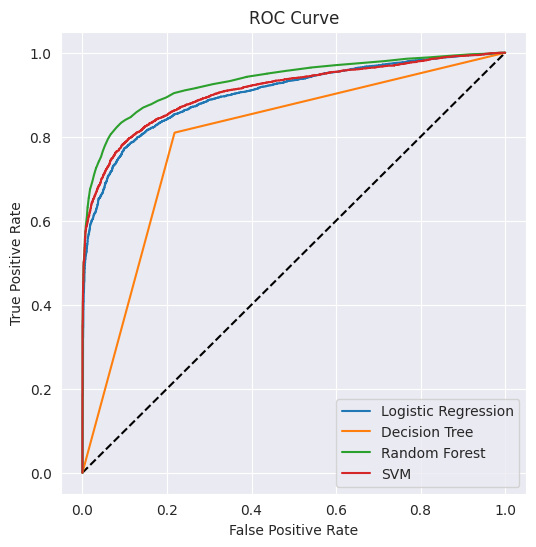

,Model,F1_score,AUC
0,Logistic Regression,0.827647,0.902183
1,Decision Tree,0.798353,0.795845
2,Random Forest,0.865778,0.931973
3,SVM,0.828565,0.909517


In [ ]:
calculate_metrics(svm, 'SVM', X_test, y_test)

### **Gradient Boosting**

In [ ]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [ ]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.847
The accuracy on test data is  0.845
The precision on test data is  0.805
The recall on test data is  0.876
The f1 on test data is  0.839
The roc_score on test data is  0.848


              precision    recall  f1-score   support

           0       0.82      0.89      0.85      4673
           1       0.88      0.80      0.84      4673

    accuracy                           0.85      9346
   macro avg       0.85      0.85      0.85      9346
weighted avg       0.85      0.85      0.85      9346



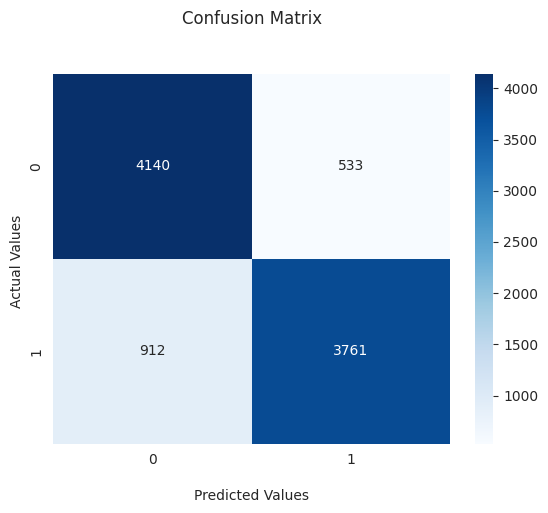

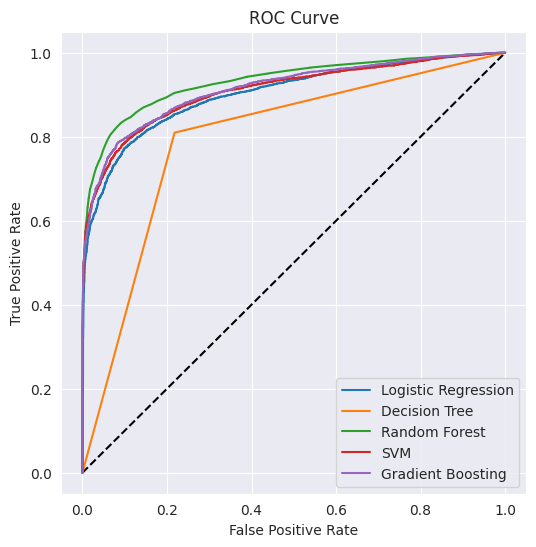

,Model,F1_score,AUC
0,Logistic Regression,0.827647,0.902183
1,Decision Tree,0.798353,0.795845
2,Random Forest,0.865778,0.931973
3,SVM,0.828565,0.909517
4,Gradient Boosting,0.838854,0.914257


In [ ]:
calculate_metrics(gbc, 'Gradient Boosting', X_test, y_test)

### **XG Boosting**

In [ ]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [ ]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

In [ ]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.911
The accuracy on test data is  0.862
The precision on test data is  0.819
The recall on test data is  0.895
The f1 on test data is  0.856
The roc_score on test data is  0.864


              precision    recall  f1-score   support

           0       0.83      0.90      0.87      4673
           1       0.90      0.82      0.86      4673

    accuracy                           0.86      9346
   macro avg       0.86      0.86      0.86      9346
weighted avg       0.86      0.86      0.86      9346



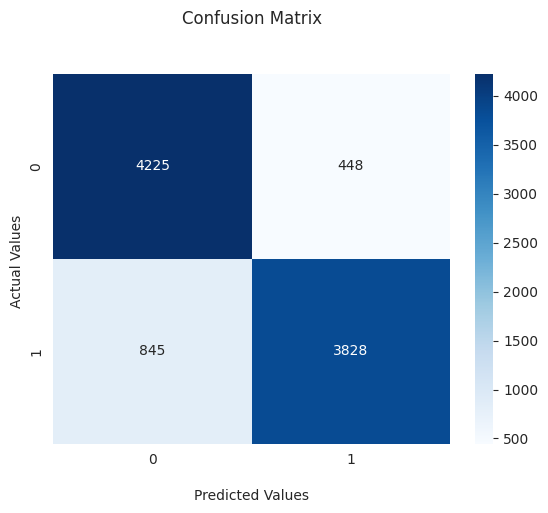

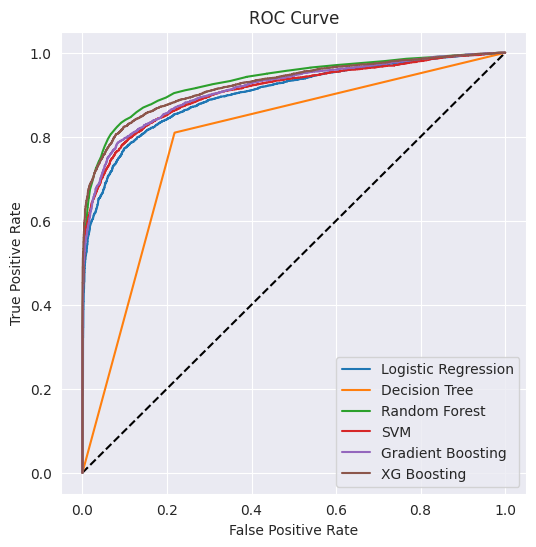

,Model,F1_score,AUC
0,Logistic Regression,0.827647,0.902183
1,Decision Tree,0.798353,0.795845
2,Random Forest,0.865778,0.931973
3,SVM,0.828565,0.909517
4,Gradient Boosting,0.838854,0.914257
5,XG Boosting,0.855515,0.924543


In [ ]:
calculate_metrics(xgb, 'XG Boosting', X_test, y_test)

## Baseline Model Comparision

In [ ]:
all_lassifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_svm, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_logi, accuracy_dtc, accuracy_rfc, accuracy_svm, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_svm, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_logi, recall_score_dtc, recall_score_rfc, recall_score_svm, recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_svm, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_logi, roc_score_dtc, roc_score_rfc, roc_score_svm, roc_score_gbc, roc_score_xgb]

In [ ]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score,
                           'Recall': all_recall_score, 'F1 Score': all_f1_score, 'AUC': all_auc_score})

In [ ]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.827,0.834,0.799,0.858,0.828,0.835
1,Decision Tree,1.000,0.796,0.809,0.788,0.798,0.796
2,Random Forest,0.999,0.871,0.834,0.900,0.866,0.873
3,SVM,0.846,0.841,0.768,0.899,0.829,0.848
4,Gradient Boosting,0.847,0.845,0.805,0.876,0.839,0.848
5,XG Boosting,0.911,0.862,0.819,0.895,0.856,0.864


In [ ]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
2,Random Forest,0.999,0.871,0.834,0.900,0.866,0.873
5,XG Boosting,0.911,0.862,0.819,0.895,0.856,0.864
4,Gradient Boosting,0.847,0.845,0.805,0.876,0.839,0.848
3,SVM,0.846,0.841,0.768,0.899,0.829,0.848
0,Logistic Regression,0.827,0.834,0.799,0.858,0.828,0.835
1,Decision Tree,1.000,0.796,0.809,0.788,0.798,0.796


## **Feature Importance On Random Forest Model**

In [ ]:
features = list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter')

In [ ]:
feature_importances_rfc = rfc.feature_importances_

In [ ]:
feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

In [ ]:
feature_importances_rfc_df.sort_values(ascending=False)[0:15]

PAY_SEPT_0          0.071648
LIMIT_BAL           0.049255
BILL_AMT_SEPT       0.047222
BILL_AMT_JUL        0.043074
BILL_AMT_AUG        0.041905
AGE                 0.041399
BILL_AMT_JUN        0.041256
PAY_AMT_SEPT        0.040951
BILL_AMT_APR        0.040238
BILL_AMT_MAY        0.039859
PAY_AMT_AUG         0.039539
PAY_AMT_JUL         0.037410
PAY_AMT_APR         0.035258
PAY_AMT_JUN         0.033510
MARRIAGE_Married    0.032693
dtype: float64

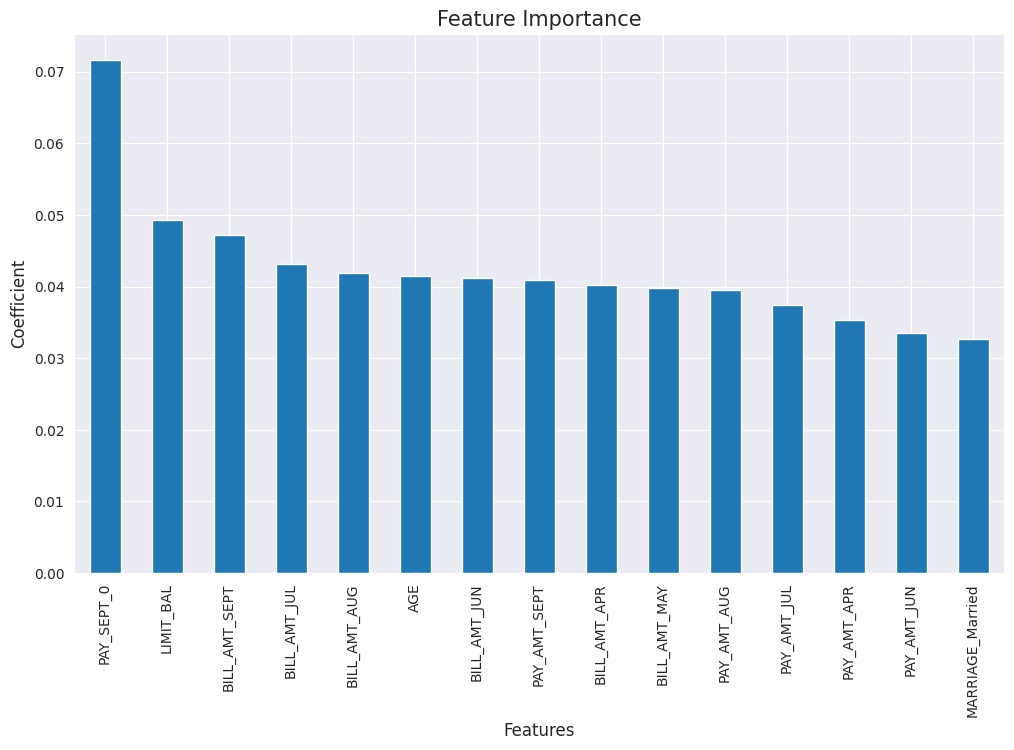

In [ ]:
fig = plt.figure(figsize=(12,7))
feature_importances_rfc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

Above 15 features are the most important features of random forest classifier.

## 5.2.  Cross Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

### **Logistic Regression - Optimal**

In [ ]:
# penalty in Logistic Regression Classifier
penalties = ['l1','l2', 'elasticnet', 'none']

# hyperparameter C
C= [ 0.001, 0.1, 0.5, 1, 1.5, 5, 10]

# Hyperparameter Grid
param_dict = {'penalty':penalties,
              'max_iter' : [100, 1000,2500],
              'C' : C }

In [ ]:
# Create an instance of the Logistic Regression
logi = LogisticRegression()

# Grid search
logi_grid = GridSearchCV(estimator=logi,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
logi_grid.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 0.5, 1, 1.5, 5, 10],
                         'max_iter': [100, 1000, 2500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc', verbose=3)

In [ ]:
logi_grid.best_estimator_

LogisticRegression(C=0.1)

In [ ]:
logi_grid.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}

In [ ]:
logi_optimal_model = logi_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_logi_grid = logi_optimal_model.predict(X_test)
y_train_pred_logi_grid = logi_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Logistic Regression after CV and Hyperparameter Tunning
train_accuracy_logi_grid = round(accuracy_score(y_train_pred_logi_grid,y_train), 3)
accuracy_logi_grid = round(accuracy_score(y_pred_logi_grid,y_test), 3)
precision_score_logi_grid = round(precision_score(y_pred_logi_grid, y_test), 3)
recall_score_logi_grid = round(recall_score(y_pred_logi_grid,y_test), 3)
f1_score_logi_grid = round(f1_score(y_pred_logi_grid,y_test), 3)
auc_logi_grid = round(roc_auc_score(y_pred_logi_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi_grid)
print("The accuracy on test data is ", accuracy_logi_grid)
print("The precision on test data is ", precision_score_logi_grid)
print("The recall on test data is ", recall_score_logi_grid)
print("The f1 on test data is ", f1_score_logi_grid)
print("The auc on test data is ", auc_logi_grid)

The accuracy on train data is  0.827
The accuracy on test data is  0.834
The precision on test data is  0.8
The recall on test data is  0.858
The f1 on test data is  0.828
The auc on test data is  0.835


In [ ]:
# Get the confusion matrices for train and test
train_cm_logi_grid = confusion_matrix(y_train,y_train_pred_logi_grid)
test_cm_logi_grid = confusion_matrix(y_test,y_pred_logi_grid )

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      4673
           1       0.86      0.80      0.83      4673

    accuracy                           0.83      9346
   macro avg       0.84      0.83      0.83      9346
weighted avg       0.84      0.83      0.83      9346



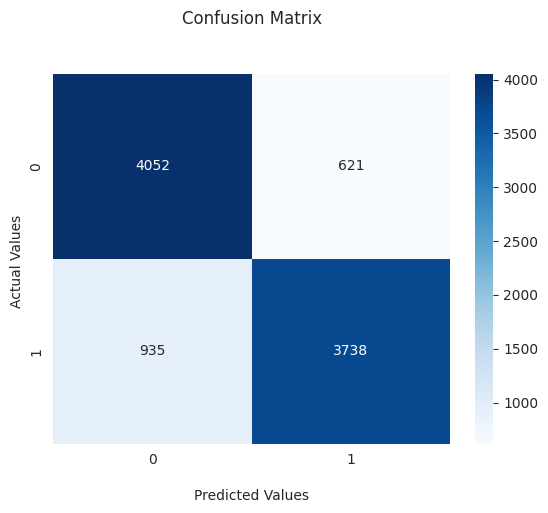

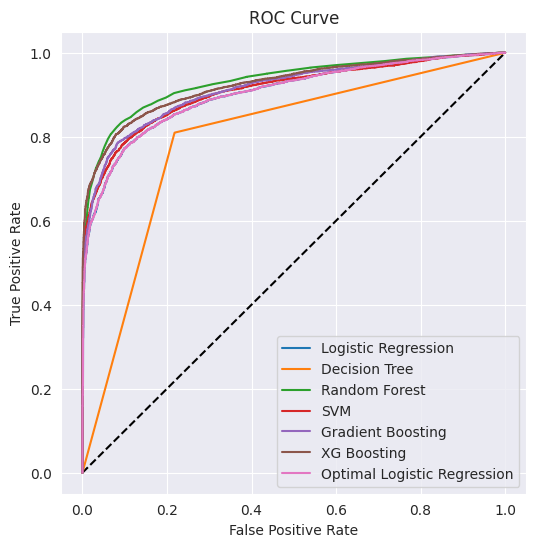

,Model,F1_score,AUC
0,Logistic Regression,0.827647,0.902183
1,Decision Tree,0.798353,0.795845
2,Random Forest,0.865778,0.931973
3,SVM,0.828565,0.909517
4,Gradient Boosting,0.838854,0.914257
5,XG Boosting,0.855515,0.924543
6,Optimal Logistic Regression,0.827724,0.902274


In [ ]:
calculate_metrics(logi_optimal_model, 'Optimal Logistic Regression', X_test, y_test)

### **Decision Tree - Optimal**

In [ ]:
# The maximum depth of the tree
depth_of_tree = [10,15,20]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [20,30,40]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [ ]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [ ]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=40,
                       min_samples_split=0.001)

In [ ]:
dtc_grid.best_params_

{'max_depth': 20, 'min_samples_leaf': 40, 'min_samples_split': 0.001}

In [ ]:
dtc_optimal_model = dtc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimal_model.predict(X_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test), 3)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on test data is ", accuracy_dtc_grid)
print("The precision on test data is ", precision_score_dtc_grid)
print("The recall on test data is ", recall_score_dtc_grid)
print("The f1 on test data is ", f1_score_dtc_grid)
print("The auc on test data is ", auc_dtc_grid)

The accuracy on train data is  0.844
The accuracy on test data is  0.825
The precision on test data is  0.781
The recall on test data is  0.857
The f1 on test data is  0.817
The auc on test data is  0.828


              precision    recall  f1-score   support

           0       0.80      0.87      0.83      4673
           1       0.86      0.78      0.82      4673

    accuracy                           0.83      9346
   macro avg       0.83      0.83      0.83      9346
weighted avg       0.83      0.83      0.83      9346



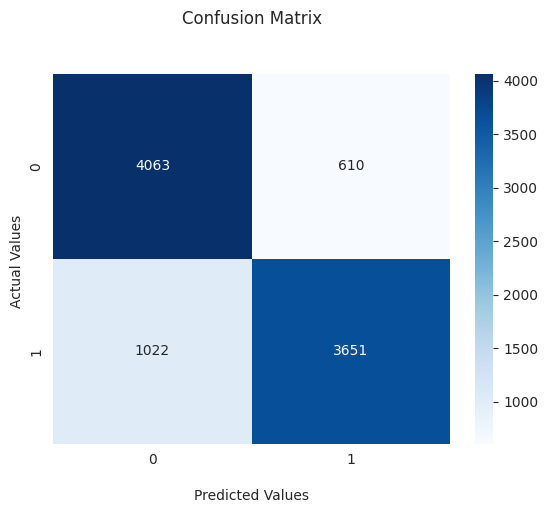

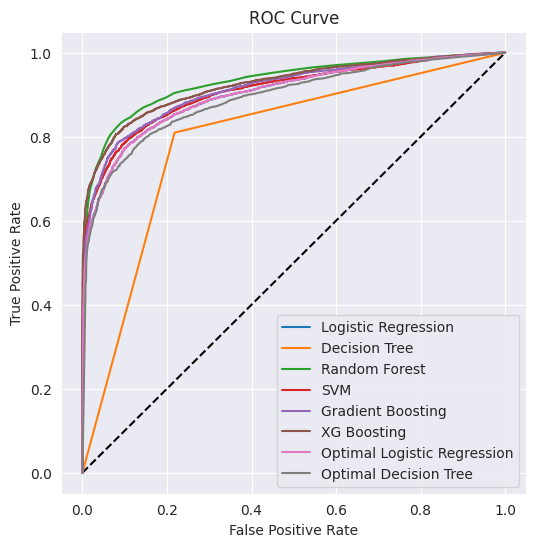

,Model,F1_score,AUC
0,Logistic Regression,0.827647,0.902183
1,Decision Tree,0.798353,0.795845
2,Random Forest,0.865778,0.931973
3,SVM,0.828565,0.909517
4,Gradient Boosting,0.838854,0.914257
5,XG Boosting,0.855515,0.924543
6,Optimal Logistic Regression,0.827724,0.902274
7,Optimal Decision Tree,0.817327,0.891986


In [ ]:
calculate_metrics(dtc_optimal_model, 'Optimal Decision Tree', X_test, y_test)

### **Support Vector Machine - Optimal**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Hyperparameter Grid
param_dict = {'C':[1, 10] ,
              'kernel': ['rbf']}

In [ ]:
# Create an instance of the support vector classifier
svm=SVC(probability=True)

# Grid search
svm_grid = RandomizedSearchCV(estimator = svm, param_distributions = param_dict,
                       cv = 2, verbose=2, n_jobs = -1, scoring= 'roc_auc')
# fitting model
svm_grid.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [1, 10], 'kernel': ['rbf']},
                   scoring='roc_auc', verbose=2)

In [ ]:
svm_grid.best_estimator_

SVC(C=1, probability=True)

In [ ]:
svm_grid.best_params_

{'kernel': 'rbf', 'C': 1}

In [ ]:
svm_optimal_model = svm_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_svm_grid=svm_optimal_model.predict(X_test)
y_train_pred_svm_grid=svm_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_svm_grid = svm_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_svm_grid = svm_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Support Vector Classifier after CV and Hyperparameter Tunning
train_accuracy_svm_grid = round(accuracy_score(y_train_pred_svm_grid,y_train), 3)
accuracy_svm_grid = round(accuracy_score(y_pred_svm_grid,y_test), 3)
precision_score_svm_grid = round(precision_score(y_pred_svm_grid,y_test), 3)
recall_score_svm_grid = round(recall_score(y_pred_svm_grid,y_test), 3)
f1_score_svm_grid = round(f1_score(y_pred_svm_grid,y_test), 3)
auc_svm_grid = round(roc_auc_score(y_pred_svm_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_svm_grid)
print("The accuracy on test data is ", accuracy_svm_grid)
print("The precision on test data is ", precision_score_svm_grid)
print("The recall on test data is ", recall_score_svm_grid)
print("The f1 on test data is ", f1_score_svm_grid)
print("The auc on test data is ", auc_svm_grid)

The accuracy on train data is  0.846
The accuracy on test data is  0.841
The precision on test data is  0.768
The recall on test data is  0.899
The f1 on test data is  0.829
The auc on test data is  0.848


              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4673
           1       0.90      0.77      0.83      4673

    accuracy                           0.84      9346
   macro avg       0.85      0.84      0.84      9346
weighted avg       0.85      0.84      0.84      9346



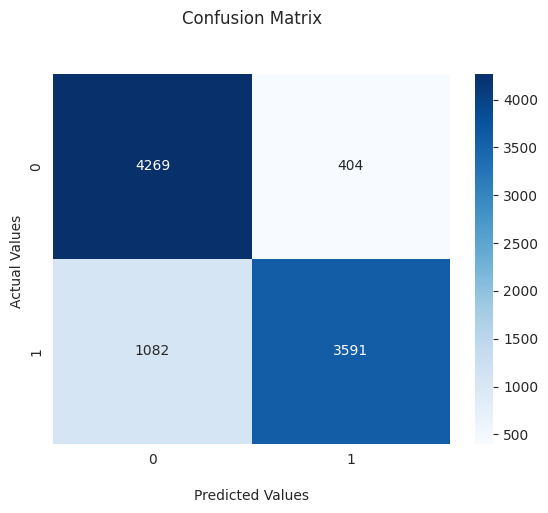

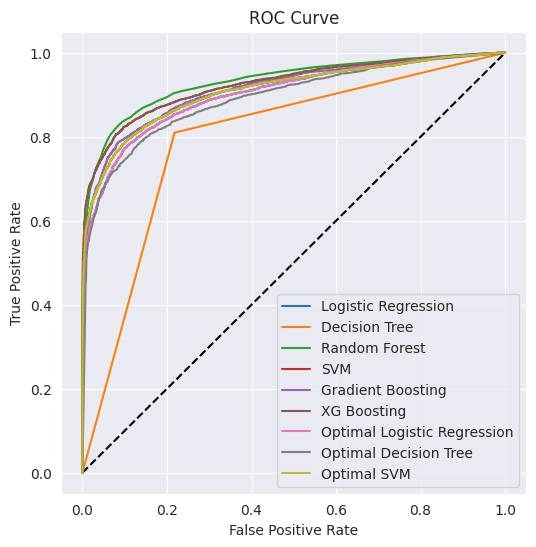

,Model,F1_score,AUC
0,Logistic Regression,0.827647,0.902183
1,Decision Tree,0.798353,0.795845
2,Random Forest,0.865778,0.931973
3,SVM,0.828565,0.909517
4,Gradient Boosting,0.838854,0.914257
5,XG Boosting,0.855515,0.924543
6,Optimal Logistic Regression,0.827724,0.902274
7,Optimal Decision Tree,0.817327,0.891986
8,Optimal SVM,0.828565,0.909517


In [ ]:
calculate_metrics(svm_optimal_model, 'Optimal SVM', X_test, y_test)

### **Random Forest Classifier - Optimal**

In [ ]:
# Number of trees
n_estimators = [50,100,150]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [20,70,120]

# Minimum number of samples required at each leaf node
min_samples_leaf = [30,40]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

# Grid search
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
# fitting model
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=20, n_estimators=50; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=20, n_estimators=50; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=20, n_estimators=50; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=20, n_estimators=50; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=20, n_estimators=50; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=20, n_estimators=100; total time=   4.2s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=20, n_estimators=100; total time=   4.5s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=20, n_estimators=100; total time=   4.8s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=20, n_estimators=100; total time=   4.2s
[CV] END max_dep

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [30, 40],
                         'min_samples_split': [20, 70, 120],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=2)

In [ ]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=30, min_samples_split=20)

In [ ]:
rfc_grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 30,
 'min_samples_split': 20,
 'n_estimators': 100}

In [ ]:
rfc_optimal_model = rfc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(X_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test), 3)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc_grid)
print("The accuracy on test data is ", accuracy_rfc_grid)
print("The precision on test data is ", precision_score_rfc_grid)
print("The recall on test data is ", recall_score_rfc_grid)
print("The f1 on test data is ", f1_score_rfc_grid)
print("The auc on test data is ", auc_rfc_grid)

The accuracy on train data is  0.849
The accuracy on test data is  0.839
The precision on test data is  0.801
The recall on test data is  0.867
The f1 on test data is  0.832
The auc on test data is  0.841


              precision    recall  f1-score   support

           0       0.81      0.88      0.84      4673
           1       0.87      0.80      0.83      4673

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



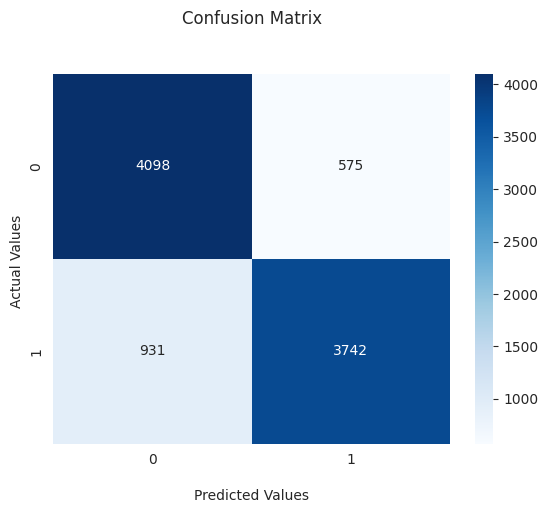

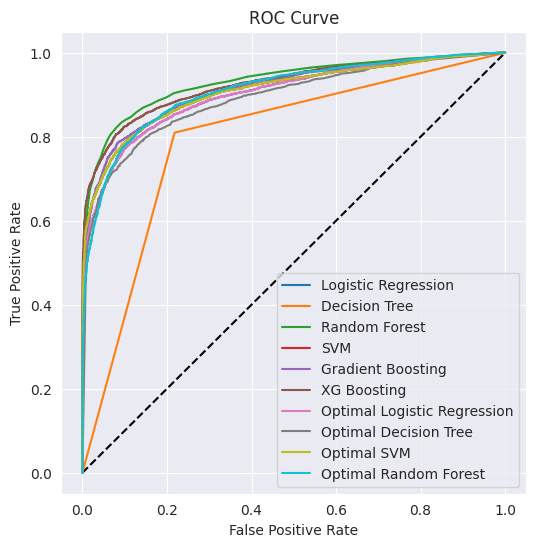

,Model,F1_score,AUC
0,Logistic Regression,0.827647,0.902183
1,Decision Tree,0.798353,0.795845
2,Random Forest,0.865778,0.931973
3,SVM,0.828565,0.909517
4,Gradient Boosting,0.838854,0.914257
5,XG Boosting,0.855515,0.924543
6,Optimal Logistic Regression,0.827724,0.902274
7,Optimal Decision Tree,0.817327,0.891986
8,Optimal SVM,0.828565,0.909517
9,Optimal Random Forest,0.832481,0.910436


In [ ]:
calculate_metrics(rfc_optimal_model, 'Optimal Random Forest', X_test, y_test)

### **Gradient Boosting - Optimal**

In [ ]:
# to shrinks the contribution of each tree by learning_rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'learning_rate': learning_rates,
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid search
gbc_grid = RandomizedSearchCV(estimator=gbc,
                       param_distributions = param_dict,
                       cv = 2, verbose=2, scoring='roc_auc')
# fitting model
gbc_grid.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=0.5, max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=  50.6s
[CV] END learning_rate=0.5, max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=  49.6s
[CV] END learning_rate=0.5, max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time= 1.8min
[CV] END learning_rate=0.5, max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time= 1.8min
[CV] END learning_rate=1, max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time= 1.8min
[CV] END learning_rate=1, max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time= 1.8min
[CV] END learning_rate=0.1, max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=  52.8s
[CV] END learning_rate=0.1, max_depth=30, min_samples_leaf=50, min_samples_split=50, 

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]},
                   scoring='roc_auc', verbose=2)

In [ ]:
gbc_grid.best_estimator_

GradientBoostingClassifier(max_depth=30, min_samples_leaf=50,
                           min_samples_split=50, random_state=42)

In [ ]:
gbc_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 50,
 'min_samples_leaf': 50,
 'max_depth': 30,
 'learning_rate': 0.1}

In [ ]:
gbc_optimal_model = gbc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_gbc_grid=gbc_optimal_model.predict(X_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Gradient Boosting after CV and Hyperparameter Tunning
train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 3)
accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 3)
precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid,y_test), 3)
recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 3)
f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 3)
auc_gbc_grid = round(roc_auc_score(y_pred_gbc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc_grid)
print("The accuracy on test data is ", accuracy_gbc_grid)
print("The precision on test data is ", precision_score_gbc_grid)
print("The recall on test data is ", recall_score_gbc_grid)
print("The f1 on test data is ", f1_score_gbc_grid)
print("The auc on test data is ", auc_gbc_grid)

The accuracy on train data is  0.992
The accuracy on test data is  0.867
The precision on test data is  0.828
The recall on test data is  0.898
The f1 on test data is  0.861
The auc on test data is  0.869


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4673
           1       0.90      0.83      0.86      4673

    accuracy                           0.87      9346
   macro avg       0.87      0.87      0.87      9346
weighted avg       0.87      0.87      0.87      9346



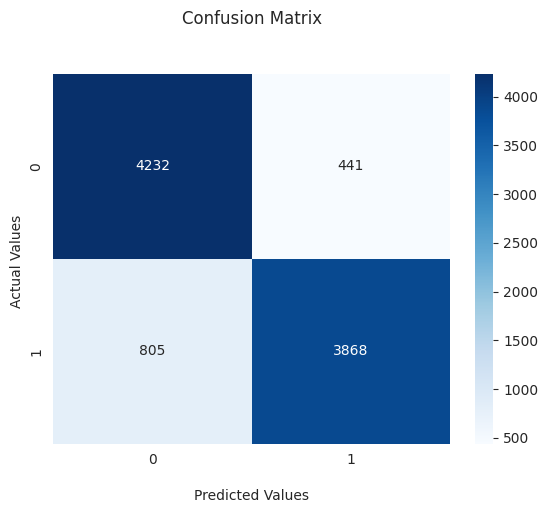

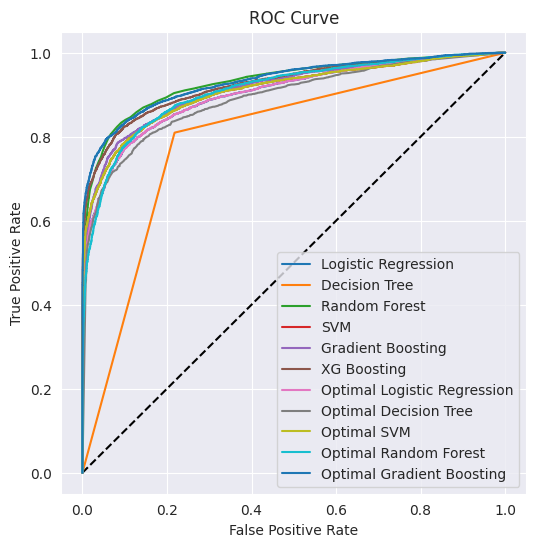

,Model,F1_score,AUC
0,Logistic Regression,0.827647,0.902183
1,Decision Tree,0.798353,0.795845
2,Random Forest,0.865778,0.931973
3,SVM,0.828565,0.909517
4,Gradient Boosting,0.838854,0.914257
5,XG Boosting,0.855515,0.924543
6,Optimal Logistic Regression,0.827724,0.902274
7,Optimal Decision Tree,0.817327,0.891986
8,Optimal SVM,0.828565,0.909517
9,Optimal Random Forest,0.832481,0.910436


In [ ]:
calculate_metrics(gbc_optimal_model, 'Optimal Gradient Boosting', X_test, y_test)

### **XG Boosting - Optimal**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'min_samples_leaf' : [40, 50]}

In [ ]:
# Create an instance of the RandomForestClassifier
xgb = XGBClassifier()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[14:25:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250]},
                   scoring='roc_auc', verbose=2)

In [ ]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, min_samples_leaf=40, missing=nan,
              monotone_constraints=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [ ]:
xgb_grid.best_params_

{'n_estimators': 250,
 'min_samples_leaf': 40,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.1}

In [ ]:
xgb_optimal_model = xgb_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_xgb_grid=xgb_optimal_model.predict(X_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for XG Boosting after CV and Hyperparameter Tunning
train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 3)
accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 3)
precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid,y_test), 3)
recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 3)
f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 3)
auc_xgb_grid = round(roc_auc_score(y_pred_xgb_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb_grid)
print("The accuracy on test data is ", accuracy_xgb_grid)
print("The precision on test data is ", precision_score_xgb_grid)
print("The recall on test data is ", recall_score_xgb_grid)
print("The f1 on test data is ", f1_score_xgb_grid)
print("The auc on test data is ", auc_xgb_grid)

The accuracy on train data is  0.998
The accuracy on test data is  0.873
The precision on test data is  0.832
The recall on test data is  0.906
The f1 on test data is  0.867
The auc on test data is  0.875


              precision    recall  f1-score   support

           0       0.84      0.91      0.88      4673
           1       0.91      0.83      0.87      4673

    accuracy                           0.87      9346
   macro avg       0.88      0.87      0.87      9346
weighted avg       0.88      0.87      0.87      9346



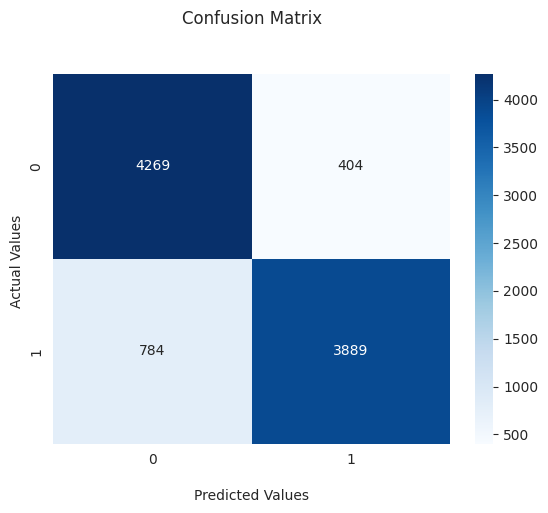

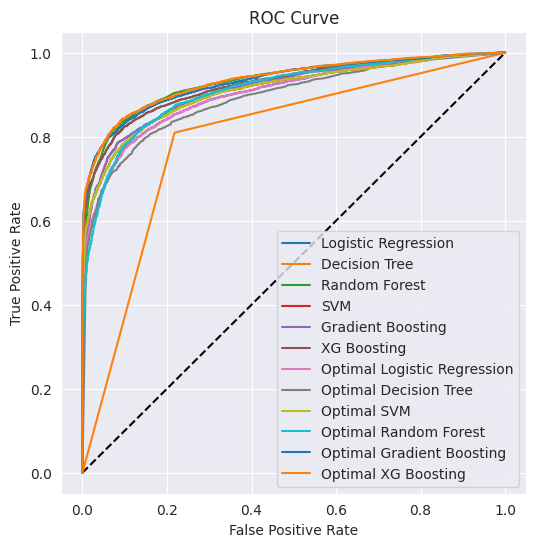

,Model,F1_score,AUC
0,Logistic Regression,0.827647,0.902183
1,Decision Tree,0.798353,0.795845
2,Random Forest,0.865778,0.931973
3,SVM,0.828565,0.909517
4,Gradient Boosting,0.838854,0.914257
5,XG Boosting,0.855515,0.924543
6,Optimal Logistic Regression,0.827724,0.902274
7,Optimal Decision Tree,0.817327,0.891986
8,Optimal SVM,0.828565,0.909517
9,Optimal Random Forest,0.832481,0.910436


In [ ]:
calculate_metrics(xgb_optimal_model, 'Optimal XG Boosting', X_test, y_test)

# Final Model Comparision

In [ ]:
grid_classifiers = ['Optimal Logistic Regression', 'Optimal Decision Tree', 'Optimal Random Forest',
                    'Optimal SVM', 'Optimal Gradient Boosting', 'Optimal XG Boosting']
grid_train_accuracy = [train_accuracy_logi_grid, train_accuracy_dtc_grid, train_accuracy_rfc_grid, train_accuracy_svm_grid, train_accuracy_gbc_grid, train_accuracy_xgb_grid]
grid_test_accuracy = [accuracy_logi_grid, accuracy_dtc_grid, accuracy_rfc_grid, accuracy_svm_grid, accuracy_gbc_grid, accuracy_xgb_grid]
grid_precision_score = [precision_score_logi_grid, precision_score_dtc_grid, precision_score_rfc_grid, precision_score_svm_grid, precision_score_gbc_grid, precision_score_xgb_grid]
grid_recall_score = [recall_score_logi_grid, recall_score_dtc_grid, recall_score_rfc_grid, recall_score_svm_grid, recall_score_gbc_grid, recall_score_xgb_grid]
grid_f1_score = [f1_score_logi_grid, f1_score_dtc_grid, f1_score_rfc_grid, f1_score_svm_grid, f1_score_gbc_grid, f1_score_xgb_grid]
grid_auc_score = [auc_logi_grid, auc_dtc_grid, auc_rfc_grid, auc_svm_grid, auc_gbc_grid, auc_xgb_grid]

In [ ]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy,
                                'Precision': grid_precision_score, 'Recall': grid_recall_score, 'F1 Score': grid_f1_score , 'AUC': grid_auc_score})
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()
all_comparision_df.drop('index', axis=1, inplace=True)
all_comparision_df.sort_values('AUC', axis=0, ascending=False, inplace=True)
all_comparision_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
11,Optimal XG Boosting,0.998,0.873,0.832,0.906,0.867,0.875
2,Random Forest,0.999,0.871,0.834,0.900,0.866,0.873
10,Optimal Gradient Boosting,0.992,0.867,0.828,0.898,0.861,0.869
5,XG Boosting,0.911,0.862,0.819,0.895,0.856,0.864
3,SVM,0.846,0.841,0.768,0.899,0.829,0.848
4,Gradient Boosting,0.847,0.845,0.805,0.876,0.839,0.848
9,Optimal SVM,0.846,0.841,0.768,0.899,0.829,0.848
8,Optimal Random Forest,0.849,0.839,0.801,0.867,0.832,0.841
0,Logistic Regression,0.827,0.834,0.799,0.858,0.828,0.835
6,Optimal Logistic Regression,0.827,0.834,0.800,0.858,0.828,0.835


# **Conclusion**
- From all baseline model, the Random Forest classifier shows the highest test accuracy and F1 score and AUC.
- The baseline model of the Random Forest and Decision Tree shows huge difference in train and test accuracy which shows overfitting.
- After cross-validation and hyperparameter tuning, XG Boost shows the highest test accuracy score of 87.3% and AUC is 0.875.
- Cross-validation and hyperparameter tunning certainly reduce the chances of overfitting and also increase performance of model.

At the end, having the ability to predict 90% (recall score) of potential defaults would save a-lot of money on credit card charge-offs. Obviously, real-world application is more nuanced, but this modeling process is a step in the right direction.